In [1]:
import numpy as np
import pandas as pd 
from keras.preprocessing.image import ImageDataGenerator, load_img,img_to_array
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random
import os
from keras.models import Sequential
from keras.layers.advanced_activations import LeakyReLU
from keras.layers import Conv2D,MaxPooling2D,Dropout,Flatten,Dense,Activation,BatchNormalization
from zipfile import ZipFile

Using TensorFlow backend.


In [2]:
zf=ZipFile("../input/facial-keypoints-detection/training.zip")
zf.extractall('.')

In [3]:
train_df=pd.read_csv("training.csv")

In [4]:
train_df.head()

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,...,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y,Image
0,66.033564,39.002274,30.227008,36.421678,59.582075,39.647423,73.130346,39.969997,36.356571,37.389402,...,57.066803,61.195308,79.970165,28.614496,77.388992,43.312602,72.935459,43.130707,84.485774,238 236 237 238 240 240 239 241 241 243 240 23...
1,64.332936,34.970077,29.949277,33.448715,58.856170,35.274349,70.722723,36.187166,36.034723,34.361532,...,55.660936,56.421447,76.352000,35.122383,76.047660,46.684596,70.266553,45.467915,85.480170,219 215 204 196 204 211 212 200 180 168 178 19...
2,65.057053,34.909642,30.903789,34.909642,59.412000,36.320968,70.984421,36.320968,37.678105,36.320968,...,53.538947,60.822947,73.014316,33.726316,72.732000,47.274947,70.191789,47.274947,78.659368,144 142 159 180 188 188 184 180 167 132 84 59 ...
3,65.225739,37.261774,32.023096,37.261774,60.003339,39.127179,72.314713,38.380967,37.618643,38.754115,...,54.166539,65.598887,72.703722,37.245496,74.195478,50.303165,70.091687,51.561183,78.268383,193 192 193 194 194 194 193 192 168 111 50 12 ...
4,66.725301,39.621261,32.244810,38.042032,58.565890,39.621261,72.515926,39.884466,36.982380,39.094852,...,64.889521,60.671411,77.523239,31.191755,76.997301,44.962748,73.707387,44.227141,86.871166,147 148 160 196 215 214 216 217 219 220 206 18...


In [5]:
train_df.isnull().any().value_counts()

True     28
False     3
dtype: int64

In [6]:
train_df.fillna(method='ffill',inplace=True)

In [7]:
train_df.isnull().any().value_counts()

False    31
dtype: int64

In [8]:
train_df["Image"][0].split(' ')[:10]

['238', '236', '237', '238', '240', '240', '239', '241', '241', '243']

In [9]:
imag = []
for i in range(0,7049):
    img = train_df['Image'][i].split(' ')
    #img = ['0' if x == '' else x for x in img]
    imag.append(img)


In [10]:
image_list=np.array(imag,dtype='float')
image_list.shape

(7049, 9216)

In [11]:
X_train=image_list.reshape(-1,96,96,1)
X_train.shape

(7049, 96, 96, 1)

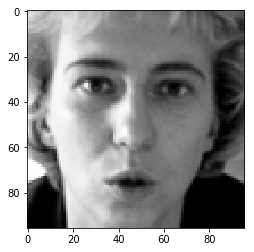

In [12]:
plt.imshow(X_train[1].reshape(96,96),cmap='gray')

In [13]:
training=train_df.drop("Image",axis=1)
y_train=[]
for i in range(0,7049):
    y=training.iloc[i,:]
    y_train.append(y)
y_train=np.array(y_train,dtype='float')

In [14]:
y_train.shape

(7049, 30)

In [15]:
model=Sequential()
model.add(Conv2D(32,(3,3),padding='same',input_shape=(96,96,1)))
model.add(LeakyReLU(alpha=0.1))
model.add(BatchNormalization())

model.add(Conv2D(32,(3,3),padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,(3,3),padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(BatchNormalization())

model.add(Conv2D(64,(3,3),padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(96,(3,3),padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(BatchNormalization())

model.add(Conv2D(96,(3,3),padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(128,(3,3),padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(BatchNormalization())

model.add(Conv2D(128,(3,3),padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(256,(3,3),padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(BatchNormalization())

model.add(Conv2D(256,(3,3),padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(512,(3,3),padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(BatchNormalization())

model.add(Conv2D(512,(3,3),padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(30))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 96, 96, 32)        320       
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 96, 96, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 96, 96, 32)        128       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 96, 96, 32)        9248      
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 96, 96, 32)        0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 96, 96, 32)        128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 48, 48, 32)       

In [16]:
model.compile(optimizer='adam',loss='mean_squared_error',metrics=['mae'])

In [17]:
model.fit(X_train,y_train,epochs=50,batch_size=256,validation_split=0.2)

Train on 5639 samples, validate on 1410 samples
Epoch 1/50
5639/5639 [==============================] - 15s 3ms/step - loss: 654.9844 - mae: 18.7028 - val_loss: 224.3127 - val_mae: 14.0207
Epoch 2/50
5639/5639 [==============================] - 5s 946us/step - loss: 29.3265 - mae: 4.1939 - val_loss: 26.3395 - val_mae: 4.3483
Epoch 3/50
5639/5639 [==============================] - 5s 945us/step - loss: 22.3591 - mae: 3.6232 - val_loss: 20.5385 - val_mae: 3.8878
Epoch 4/50
5639/5639 [==============================] - 5s 950us/step - loss: 20.8897 - mae: 3.4946 - val_loss: 8.0343 - val_mae: 2.0770
Epoch 5/50
5639/5639 [==============================] - 5s 951us/step - loss: 19.7851 - mae: 3.3925 - val_loss: 5.2172 - val_mae: 1.3802
Epoch 6/50
5639/5639 [==============================] - 5s 952us/step - loss: 18.5883 - mae: 3.2771 - val_loss: 7.2955 - val_mae: 1.8559
Epoch 7/50
5639/5639 [==============================] - 5s 943us/step - loss: 17.7442 - mae: 3.2006 - val_loss: 8.4360 - val

In [18]:
zf1=ZipFile("../input/facial-keypoints-detection/test.zip")
zf1.extractall(".")

In [19]:
test_df=pd.read_csv("test.csv")
test_df.shape

(1783, 2)

In [20]:
timag=[]
for i in range(0,1783):
    timg=test_df['Image'][i].split(' ')
    timag.append(timg)

In [21]:
timage_list=np.array(timag,dtype='float')
X_test=timage_list.reshape(-1,96,96,1)
X_test.shape

(1783, 96, 96, 1)

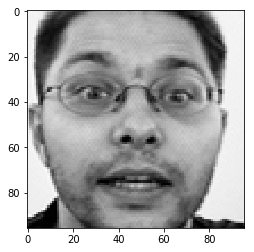

In [22]:
plt.imshow(X_test[0].reshape(96,96),cmap='gray')

In [23]:
pred=model.predict(X_test)
np.max(pred)

94.89277

In [24]:
lookid_data=pd.read_csv("../input/facial-keypoints-detection/IdLookupTable.csv")

In [25]:
lookid_list = list(lookid_data['FeatureName'])
imageID = list(lookid_data['ImageId']-1)
pre_list = list(pred)
rowid = lookid_data['RowId']
rowid=list(rowid)

In [26]:
np.array(lookid_list).shape

(27124,)

In [27]:
feature = []
for f in list(lookid_data['FeatureName']):
    feature.append(lookid_list.index(f))

In [28]:
preded = []
for x,y in zip(imageID,feature):
    preded.append(pre_list[x][y])

In [29]:
rowid = pd.Series(rowid,name = 'RowId')
loc = pd.Series(preded,name = 'Location')
submission = pd.concat([rowid,loc],axis = 1)
submission.to_csv('face_key_detection_submission.csv',index = False)

In [30]:
A=X_test[1]
A.shape

(96, 96, 1)

In [31]:
points=pred[1]
points.shape

(30,)

In [32]:
x=points[::2]
x.shape

(15,)

In [33]:
y=points[1::2]
y.shape

(15,)

Text(0.5, 1.0, 'a test image')

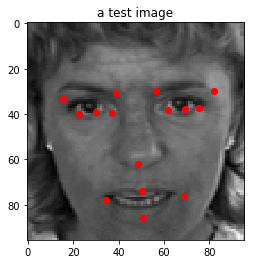

In [34]:
plt.scatter(x,y,color="red")
plt.imshow(A.reshape(96,96),cmap='gray')
plt.title("a test image") #plottin g